In [16]:
import json
import matplotlib.pyplot as plt

# Carregar o JSON do Gitleaks
with open("gitleaks-report.json", "r") as file:
    data = json.load(file)

In [17]:
rule_id_data = {}
for entry in data:
    rule_id = entry.get("RuleID", "unknown")
    file_path = entry.get("File", "unknown")
    match = entry.get("Match", "No match")
    message = entry.get("Message", "No message available")
    
    if rule_id not in rule_id_data:
        rule_id_data[rule_id] = {"files": {}, "description": entry.get("Description", "No description")}
    
    if file_path not in rule_id_data[rule_id]["files"]:
        rule_id_data[rule_id]["files"][file_path] = {"matches": set(), "message": message}
    
    rule_id_data[rule_id]["files"][file_path]["matches"].add(match)

# Exibir os resultados
for rule_id, data in rule_id_data.items():
    print(f"\nRule ID: {rule_id}")
    print(f"Description: {data['description']}")
    print("Affected Files:")
    for file, details in data["files"].items():
        print(f"  - File: {file}")
        print(f"    Message: {details['message']}")
        print(f"    Matches:")
        for match in sorted(details["matches"]):
            print(f"      - {match}")


Rule ID: generic-api-key
Description: Detected a Generic API Key, potentially exposing access to various services and sensitive operations.
Affected Files:
  - File: test/api/web3Spec.ts
    Message: Add API tests for two Web3-related endpoints
    Matches:
      - privateKey: '0x02c7a2a93289c9fbda5990bac6596993e9bb0a8d3f178175a80b7cfd983983f506'
      - privateKey: '0x5bcc3e9d38baa06e7bfaab80ae5957bbe8ef059e640311d7d6d465e6bc948e3e'
      - privateKey: '0x8343d2eb2B13A2495De435a1b15e85b98115Ce05'
  - File: test/api/erasureRequestApiSpec.ts
    Message: Fix possibility for solution spamming for "Local File Read" challenge

(partially addresses #2060)
    Matches:
      - password: 'bW9jLmxpYW1nQGhjaW5pbW1pay5ucmVvamI='
  - File: frontend/src/app/faucet/faucet.component.ts
    Message: feat: added integer overflow challenge
    Matches:
      - BeeTokenAddress = '0x36435796Ca9be2bf150CE0dECc2D8Fab5C4d6E13'
  - File: cypress/integration/e2e/totpSetup.spec.ts
    Message: feat: lint cypr

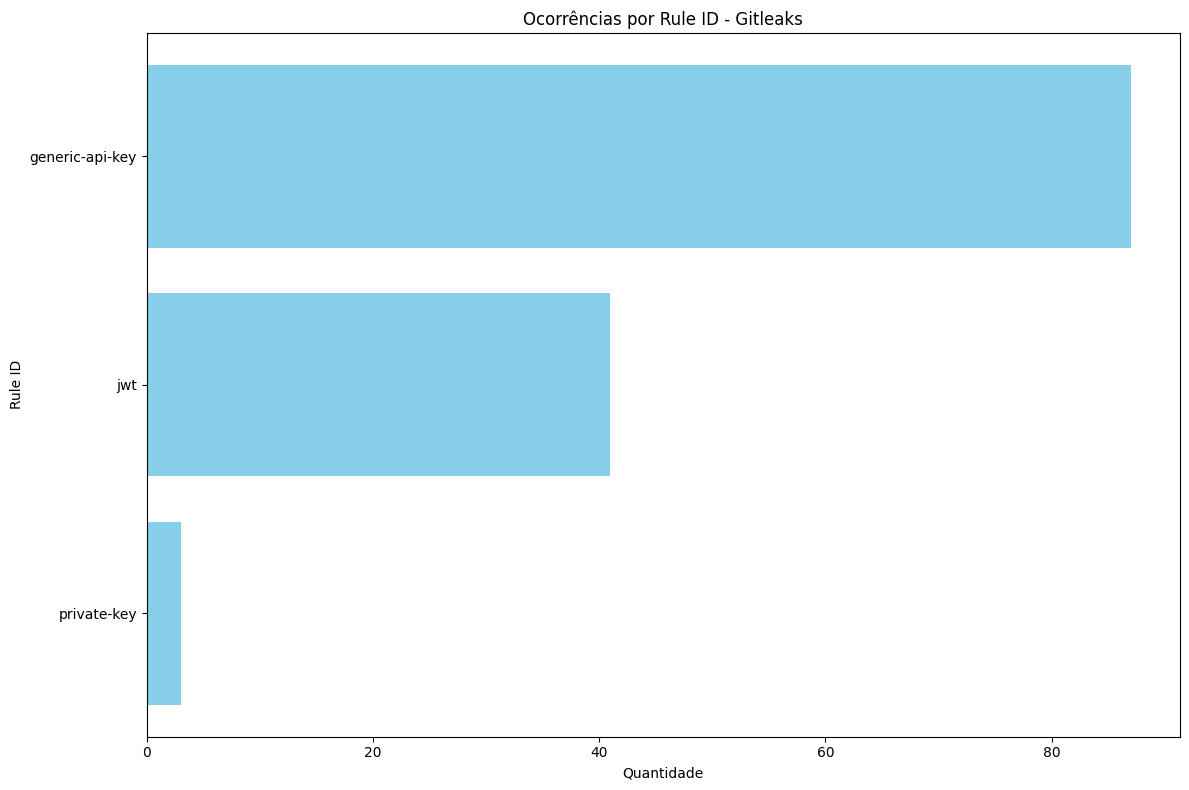

Contagens por Rule ID:
generic-api-key: 87
jwt: 41
private-key: 3


In [18]:

with open("gitleaks-report.json", "r") as file:
    gitleaks_data = json.load(file)

# Contar as ocorrências por RuleID
rule_id_counts = {}
for item in gitleaks_data:
    rule_id = item.get("RuleID", "Unknown")
    rule_id_counts[rule_id] = rule_id_counts.get(rule_id, 0) + 1

# Preparar os dados para o gráfico
rule_ids = list(rule_id_counts.keys())
counts = list(rule_id_counts.values())

# Criar o gráfico
plt.figure(figsize=(12, 8))
plt.barh(rule_ids, counts, color='skyblue')
plt.title("Ocorrências por Rule ID - Gitleaks")
plt.xlabel("Quantidade")
plt.ylabel("Rule ID")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Exibir as contagens
print("Contagens por Rule ID:")
for rule_id, count in rule_id_counts.items():
    print(f"{rule_id}: {count}")


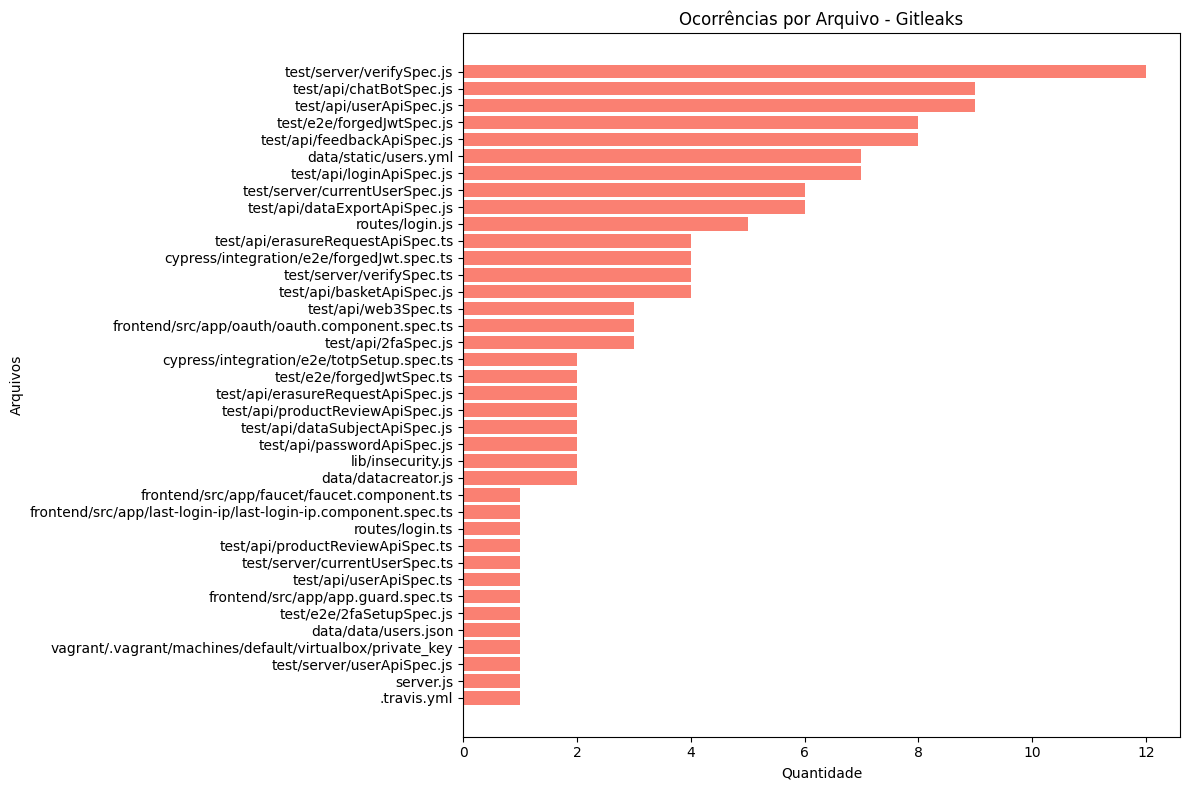

Contagens por Arquivo (Ordenadas):
test/server/verifySpec.js: 12
test/api/chatBotSpec.js: 9
test/api/userApiSpec.js: 9
test/e2e/forgedJwtSpec.js: 8
test/api/feedbackApiSpec.js: 8
data/static/users.yml: 7
test/api/loginApiSpec.js: 7
test/server/currentUserSpec.js: 6
test/api/dataExportApiSpec.js: 6
routes/login.js: 5
test/api/erasureRequestApiSpec.ts: 4
cypress/integration/e2e/forgedJwt.spec.ts: 4
test/server/verifySpec.ts: 4
test/api/basketApiSpec.js: 4
test/api/web3Spec.ts: 3
frontend/src/app/oauth/oauth.component.spec.ts: 3
test/api/2faSpec.js: 3
cypress/integration/e2e/totpSetup.spec.ts: 2
test/e2e/forgedJwtSpec.ts: 2
test/api/erasureRequestApiSpec.js: 2
test/api/productReviewApiSpec.js: 2
test/api/dataSubjectApiSpec.js: 2
test/api/passwordApiSpec.js: 2
lib/insecurity.js: 2
data/datacreator.js: 2
frontend/src/app/faucet/faucet.component.ts: 1
frontend/src/app/last-login-ip/last-login-ip.component.spec.ts: 1
routes/login.ts: 1
test/api/productReviewApiSpec.ts: 1
test/server/currentUs

In [19]:
file_counts = {}
for item in gitleaks_data:
    file_path = item.get("File", "Unknown")
    file_counts[file_path] = file_counts.get(file_path, 0) + 1

# Ordenar as contagens por quantidade (do maior para o menor)
sorted_file_counts = dict(sorted(file_counts.items(), key=lambda x: x[1], reverse=True))

# Preparar os dados para o gráfico
file_paths = list(sorted_file_counts.keys())
counts = list(sorted_file_counts.values())

# Criar o gráfico
plt.figure(figsize=(12, 8))
plt.barh(file_paths, counts, color='salmon')
plt.title("Ocorrências por Arquivo - Gitleaks")
plt.xlabel("Quantidade")
plt.ylabel("Arquivos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Exibir as contagens ordenadas
print("Contagens por Arquivo (Ordenadas):")
for file_path, count in sorted_file_counts.items():
    print(f"{file_path}: {count}")

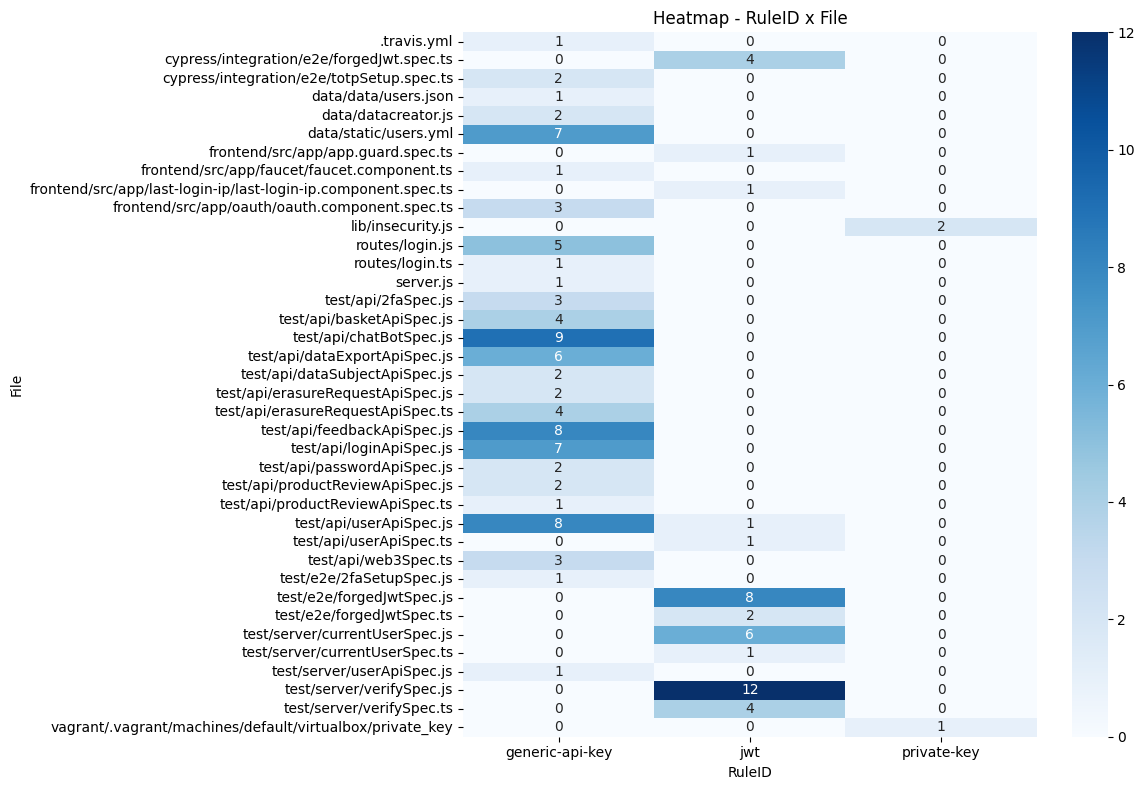

In [20]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo JSON
with open("gitleaks-report.json", "r") as file:
    gitleaks_data = json.load(file)

# Construir a tabela cruzada
data = []
for item in gitleaks_data:
    rule_id = item.get("RuleID", "Unknown")
    file_path = item.get("File", "Unknown")
    data.append({"RuleID": rule_id, "File": file_path})

df = pd.DataFrame(data)
pivot_table = df.pivot_table(index="File", columns="RuleID", aggfunc="size", fill_value=0)

# Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Heatmap - RuleID x File")
plt.xlabel("RuleID")
plt.ylabel("File")
plt.tight_layout()
plt.show()


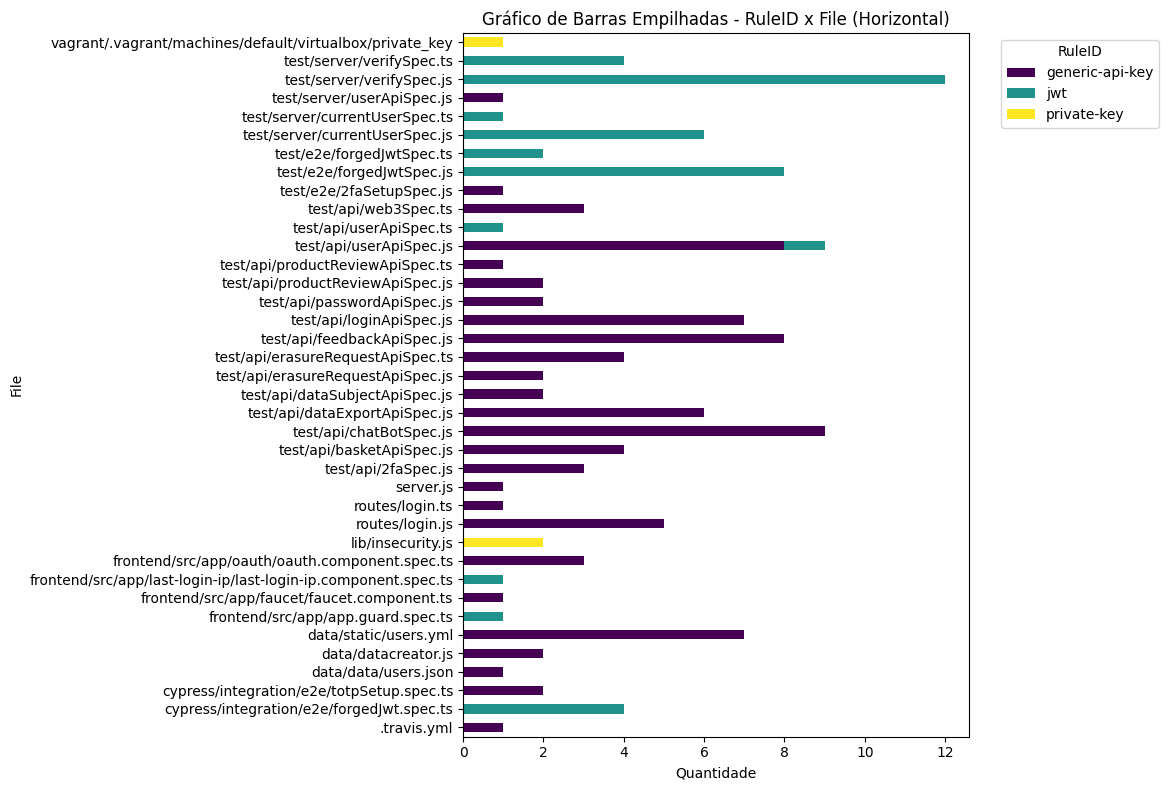

In [21]:
# Preparar os dados para o gráfico de barras empilhadas
grouped_data = df.groupby(["File", "RuleID"]).size().unstack(fill_value=0)

# Criar o gráfico de barras empilhadas horizontal
grouped_data.plot(kind="barh", stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Gráfico de Barras Empilhadas - RuleID x File (Horizontal)")
plt.ylabel("File")
plt.xlabel("Quantidade")
plt.legend(title="RuleID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
